# Libraries

In [101]:
from libraries import *
import utils
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [102]:
import imp
imp.reload(utils)
from utils import *

All packages are good to go !!


In [103]:
data_dir = '../data/Predictive_Data/'

# Problem Statement:

We are living in a digital world where people prefer to read articles online or watch videos rather than reading a book. Assume that you are a member of a marketing agency and you are given a dataset having the title, subjects, and other features based on which you have to predict what will be the material of to-be-published research so that you can tie-up with an ideal publisher and help them grow. The following are the material types:

Book

Sound disc

Videocassette

Sound cassette

Music

Mixed

CR

Task: You have to predict the column “MaterialType” and submit in the format given in the “sample_submissions.csv” file. Also, note that evaluation criteria will be the weighted f1-score.

# Approach:

1. We will perform the basic tasks of data cleaning and data wrangling.
2. We will fit the data with a basic white box algorithm to observe the accuracy and performance.
3. Since the data does'nt belongs to the users we can try Neural Networks, for better accuracy and F1 score

# Data Preprocessing and Exploration

We have been given a single dataset which has around 31653 records with around 12 columns. The target variable has around 8 different "MaterialTypes".

One of the most common data wrangling process is to check for nulls and fill them up with appropriate values

Checking Nulls and filling them with appropriate values, usually incase of numerical values we impute with median, median is considered appropriate since it's not affected by outliers, mode can also be used.
Here we will use empty strings to input values


In [79]:
persona_labelled = pd.read_csv(data_dir+'train_file.csv')
persona_labelled.shape

(31653, 12)

Detailed DF Info:


,percentage_nulls_in_each_column,categorical_vals,num_unique_vals,datatypes
ID,0.000000,False,31653,int64
UsageClass,0.000000,True,1,object
CheckoutType,0.000000,True,1,object
CheckoutYear,0.000000,True,1,int64
CheckoutMonth,0.000000,True,1,int64
Checkouts,0.000000,False,50,int64
Title,0.000000,False,31653,object
Creator,73.095757,False,6731,object
Subjects,5.569772,False,24755,object
Publisher,69.238303,False,3519,object


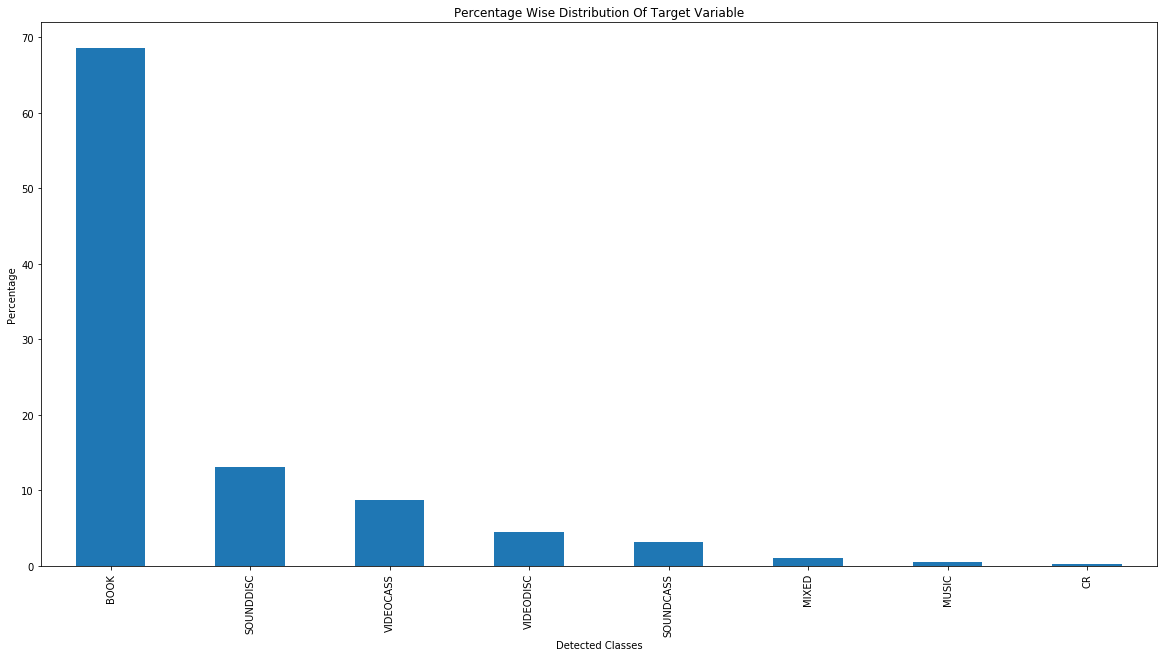

In [104]:
uts_ = utils(persona_labelled)
uts_.print_df_info(target_column='MaterialType')

# Observation:
We will consider the text columns only, for the Null values we wont drop them, but would replace them with empty string ' '.

In [7]:
persona_labelled.fillna(' ',inplace=True)

In [8]:
test_data = pd.read_csv(data_dir+'test_file.csv')
test_data.head()

,ID,UsageClass,CheckoutType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear
0,31654,Physical,Horizon,2005,4,1,Footprints at the window,NaN,"England Fiction, Space and time Fiction",NaN,NaN
1,31655,Physical,Horizon,2005,4,2,Seven brides for seven brothers,NaN,"Video recordings for the hearing impaired, Mus...",NaN,NaN
2,31656,Physical,Horizon,2005,4,2,History [sound recording] / Loudon Wainwright ...,"Wainwright, Loudon, III, 1946-",Popular music 1991 2000,"Charisma,",p1992.
3,31657,Physical,Horizon,2005,4,2,Doing big business on the internet,NaN,"Internet, Internet advertising, Information ne...",NaN,NaN
4,31658,Physical,Horizon,2005,4,2,Lets learn how to dance shag,NaN,"Shag Dance, Ballroom dancing",NaN,NaN


In [9]:
uts_test = utils(test_data)
uts_test.print_df_info(target_column='MaterialType')

Detailed DF Info:


,percentage_nulls_in_each_column,categorical_vals,num_unique_vals,datatypes
ID,0.000000,False,21102,int64
UsageClass,0.000000,True,1,object
CheckoutType,0.000000,True,1,object
CheckoutYear,0.000000,True,1,int64
CheckoutMonth,0.000000,True,1,int64
Checkouts,0.000000,False,49,int64
Title,0.000000,False,21102,object
Creator,71.576154,False,4979,object
Subjects,5.748270,False,16828,object
Publisher,67.420150,False,2680,object


<Figure size 1440x720 with 0 Axes>

In [10]:
test_data.fillna(' ',inplace=True)

# Cleaning
For cleaning the text we will use regex to remove all types of punctuations and spacings, after merging all the text into one long string.

In [11]:
persona_labelled['all_text'] = persona_labelled['Title']+persona_labelled['Creator']+persona_labelled['Subjects']+persona_labelled['Publisher']
persona_labelled.head(3)


,ID,UsageClass,CheckoutType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear,MaterialType,all_text
0,1,Physical,Horizon,2005,4,1,Tidal wave,,"Tsunamis, Tsunamis Juvenile literature",,,BOOK,"Tidal wave Tsunamis, Tsunamis Juvenile literat..."
1,2,Physical,Horizon,2005,4,1,London holiday / Richard Peck.,"Peck, Richard, 1934-",,"Viking,",1998.,BOOK,"London holiday / Richard Peck.Peck, Richard, 1..."
2,3,Physical,Horizon,2005,4,3,Cinco de Mayo : celebrating Hispanic pride / C...,"Gnojewski, Carol",Cinco de Mayo Mexican holiday History Juvenile...,"Enslow Publishers,",c2002.,BOOK,Cinco de Mayo : celebrating Hispanic pride / C...


In [12]:
#lets have a look at the uncleaned and clean data
print (persona_labelled['all_text'][1])
uts_.clean_text(persona_labelled['all_text'][1])


London holiday / Richard Peck.Peck, Richard, 1934- Viking,


'london holiday richard peck peck richard 1934 viking'

In [13]:
persona_labelled['all_text'] = persona_labelled['all_text'].map(uts_.clean_text)

In [14]:
persona_labelled.head(3)

,ID,UsageClass,CheckoutType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear,MaterialType,all_text
0,1,Physical,Horizon,2005,4,1,Tidal wave,,"Tsunamis, Tsunamis Juvenile literature",,,BOOK,tidal wave tsunamis tsunamis juvenile literature
1,2,Physical,Horizon,2005,4,1,London holiday / Richard Peck.,"Peck, Richard, 1934-",,"Viking,",1998.,BOOK,london holiday richard peck peck richard 1934 ...
2,3,Physical,Horizon,2005,4,3,Cinco de Mayo : celebrating Hispanic pride / C...,"Gnojewski, Carol",Cinco de Mayo Mexican holiday History Juvenile...,"Enslow Publishers,",c2002.,BOOK,cinco de mayo celebrating hispanic pride carol...


In [15]:
test_data['all_text'] = test_data['Title']+test_data['Creator']+test_data['Subjects']+test_data['Publisher']
test_data['all_text'] = test_data['all_text'].map(uts_.clean_text)
test_data.head(3)

,ID,UsageClass,CheckoutType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear,all_text
0,31654,Physical,Horizon,2005,4,1,Footprints at the window,,"England Fiction, Space and time Fiction",,,footprints at the window england fiction space...
1,31655,Physical,Horizon,2005,4,2,Seven brides for seven brothers,,"Video recordings for the hearing impaired, Mus...",,,seven brides for seven brothers video recordin...
2,31656,Physical,Horizon,2005,4,2,History [sound recording] / Loudon Wainwright ...,"Wainwright, Loudon, III, 1946-",Popular music 1991 2000,"Charisma,",p1992.,history sound recording loudon wainwright iii ...


In [16]:
#Mapping the target to numbers, automated target creation
persona_labelled,map_target = uts_.map_to_target('MaterialType',persona_labelled)
persona_labelled.head(3)

,ID,UsageClass,CheckoutType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear,MaterialType,all_text,target_map
0,1,Physical,Horizon,2005,4,1,Tidal wave,,"Tsunamis, Tsunamis Juvenile literature",,,BOOK,tidal wave tsunamis tsunamis juvenile literature,0
1,2,Physical,Horizon,2005,4,1,London holiday / Richard Peck.,"Peck, Richard, 1934-",,"Viking,",1998.,BOOK,london holiday richard peck peck richard 1934 ...,0
2,3,Physical,Horizon,2005,4,3,Cinco de Mayo : celebrating Hispanic pride / C...,"Gnojewski, Carol",Cinco de Mayo Mexican holiday History Juvenile...,"Enslow Publishers,",c2002.,BOOK,cinco de mayo celebrating hispanic pride carol...,0


# Corpus Inspection and Data Understanding
1. Look at the corpus, find the number of unique words, frequency of those words


Building features on 40k popular words
Performing Dimensionality Reduction


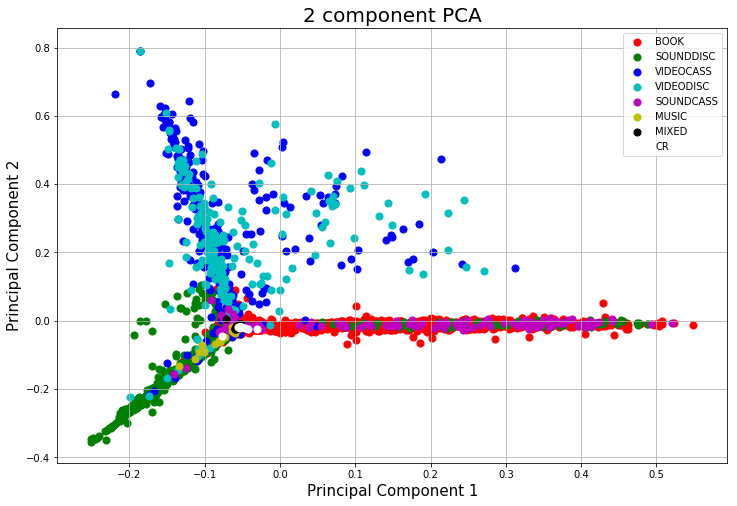

In [17]:
all_text_data = persona_labelled['all_text'].tolist()
X=uts_.corpus_inspection_data_understanding(all_text_data,persona_labelled,target_col='MaterialType')

# Observation:
1. The points are not that well separated, meaning it would be tough to define decision boundaries between different classes
2. Lets try lgbm Classifier 

In [56]:
clf = lgb.LGBMClassifier(boosting_type='goss',class_weight='balanced',drop_rate=0.9, min_data_in_leaf=100, max_bin=255,
                                 n_estimators=500,min_sum_hessian_in_leaf=1,importance_type='gain',learning_rate=0.005,bagging_fraction = 0.85,
                                 colsample_bytree = 1.0,feature_fraction = 0.1,
                                 min_child_samples = 55,min_child_weight = 5.0,min_split_gain = 0.1,subsample = 0.75,reg_alpha=0.5) 

Average F1,Accuracy: 0.4251415016150223 0.5608640238249439


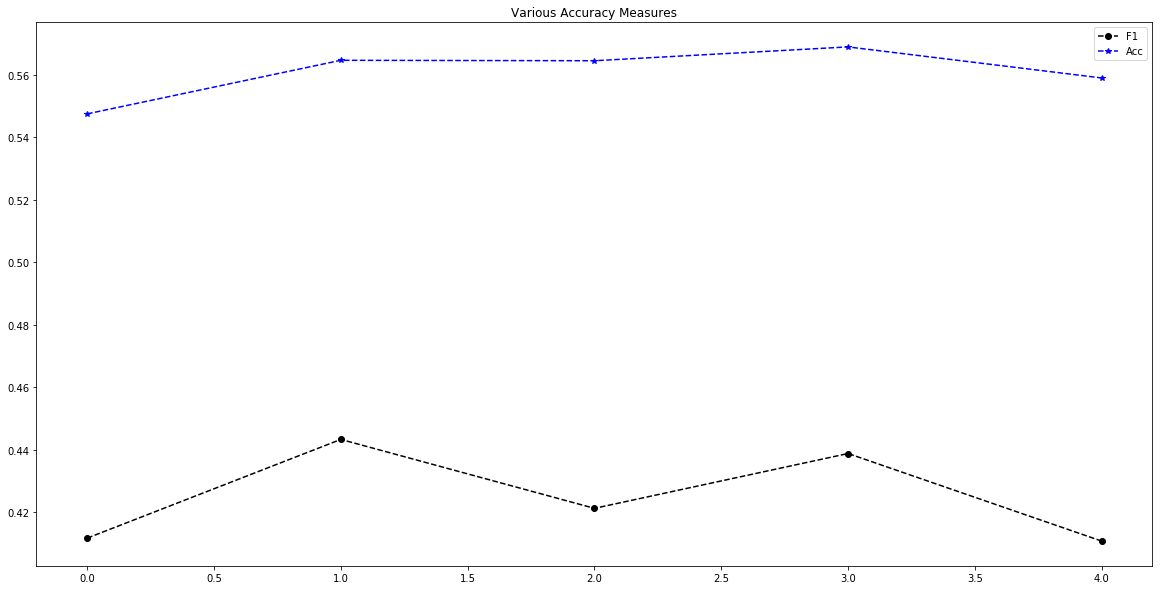

In [57]:
y=persona_labelled['target_map'].values
uts_.fitting_white_box_models(clf,X,y)

# Observation:
1. Lgbm has a hard time classifying, as we can see. The F1 score and accuracy are well below the expectations.
2. One of the reasons could be that lgbm has a cannot design the decision boundaries properly as we can see from PCA

# NN Model
We draw a simple sequence to sequence architecture model with GloVe embeddings. We have transfer learning techniques in Image Modelling, but sadly we don't have such in text, though we have Bert released recently, and has got some amazing results but industry wise acception is still required.

The newtwork learns in different ways, with more than millions of parameters we are likely to get a better prediction.

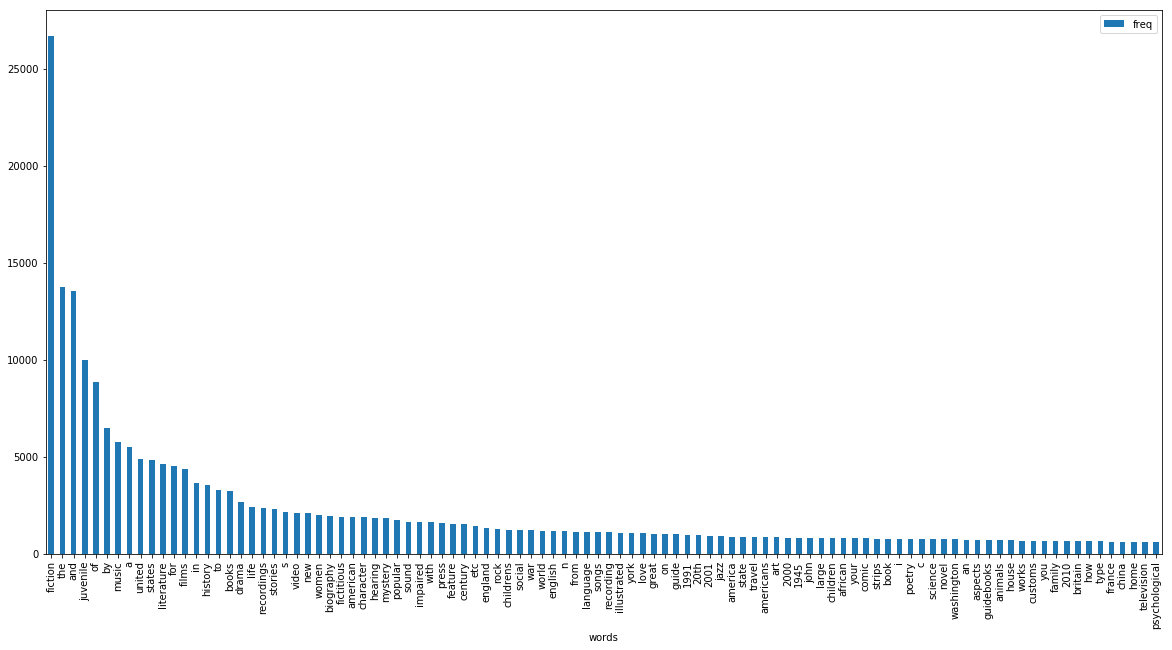

In [105]:
most_comm,corpus = uts_.corpus_details(all_text_data)

# Observations:
1. The sentences hardly have any continuity and that's likely since the dataset comprises of authors and titles. Combining them into a single text gives us the upperhand of recognizing which authors can be easily associated with Book.

# Hyperparams
Hyperparams are those params which we can tune to increase or decrease the model performance.

Explanation of each Hyperparam:

MAX_SEQUENCE_LENGTH: It's the max length of the sequence that is derived from sentence, this can be looked at by observing the maximum length of the sentence

MAX_NB_WORDS: The more number of word we associate the more the network learns for now we are associating around 95% of the words

EMBEDDING_DIM: The dimension of each word that we want, usually it's 300 but it can change depending on the embeddings we select.

BATCH_SIZE: It's the number of training size to be taken at a given time.

In [19]:
#We take the 40000 words that have been used for creating the model
MAX_SEQUENCE_LENGTH = 200
MAX_NB_WORDS = 44000
EMBEDDING_DIM = 300
BATCH_SIZE = 256

# One Hot Encoding Of The Target:

What is it?

One hot encoding basically refers to representing a word/target by 1 while the rest of the elements in the array are 0.

For ex: ['I', 'love', 'cream'],['I', 'hate', 'ice'], if we want to hot encode 'I', it would be :[1,0,0,0,0]

Why is it needed?

One hot encoding is necessary for the outputs to be in softmax probabilies form. Basically the network gives output for each sentence in a probabilistic form whose sum is always 1.


<img src="imagemap.jpg">



In [20]:
encoded = uts_.one_hot_encoding(data=persona_labelled,target_column='target_map')
encoded[0]

31653


array([1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [21]:
## split to train and val
all_sents = persona_labelled['all_text'].tolist()

X_train, X_test, y_train, y_test = train_test_split(all_sents, encoded, test_size=0.1)

In [22]:
len(X_train)

28487

# Arcitecture of The Model
We have designed a simple sequence to sequence model with features derived from external embeddings of GloVe.

<img src="m1.png">


In [87]:
## Tokenize the sentences
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(all_sents)
train_X = tokenizer.texts_to_sequences(X_train)
val_X = tokenizer.texts_to_sequences(X_test)
test_sents = test_data['all_text'].tolist()
test_X = tokenizer.texts_to_sequences(test_sents)

In [88]:
print ("An example of tokenized sentence:")
print (train_X[0])

An example of tokenized sentence:
[6824, 12, 2, 9158, 31, 1, 988, 1]


In [89]:
## Pad the sentences 
train_X = pad_sequences(train_X, maxlen=MAX_SEQUENCE_LENGTH)
val_X = pad_sequences(val_X, maxlen=MAX_SEQUENCE_LENGTH)
test_X = pad_sequences(test_X,maxlen=MAX_SEQUENCE_LENGTH)

## Get the target values
train_y = y_train
val_y = y_test

In [90]:
print ("An example of tokenized and padded sentence:")
print (train_X[0])

An example of tokenized and padded sentence:
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0  

In [26]:
#Use glove embeddings, we can further improve the result with taking various average embeddings of fasttext, paragram
embedding_matrix,embed_size,embeddings_index = uts_.create_embedding_matrix(MAX_NB_WORDS,tokenizer)
print (embedding_matrix.shape)

(44000, 300)


In [91]:
all_emb_keys = list(embeddings_index.keys())
word_ind_keys = tokenizer.word_index.keys()
count =0
words_not_found =[]
for k in word_ind_keys:
    if k in all_emb_keys:
        count = count+1
    else:
        words_not_found.append(k)
print ('Percentage of Word Vectors Acquired From Glove Embeddings:',100.0*count/len(all_emb_keys))

Percentage of Word Vectors Acquired From Glove Embeddings: 1.3717106925857132


# Imagining Word vectors

<img src="vec.png">

A visualization with the help of tensorflow projector on how similar are different words. Here we have selected a subject "fantasy fiction" and show the most similar subjects that come up. 

In [81]:
model = uts_.create_model(MAX_SEQUENCE_LENGTH,MAX_NB_WORDS,embedding_matrix,embed_size,activation='relu',output_class=8)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 200)               0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 200, 300)          13200000  
_________________________________________________________________
bidirectional_3 (Bidirection (None, 200, 128)          186880    
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 2056      
Total para

In [82]:
filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

# Innovative Application

Keras doesnt has a F1 score implementation in terms of measuring accuracy, I had to implement F1-score (macro) to be fit in Keras accuracy testing model

In [83]:
history = model.fit(train_X, train_y, batch_size=BATCH_SIZE, epochs=5, validation_data=(val_X, val_y),callbacks=[checkpoint])

Train on 28487 samples, validate on 3166 samples
Epoch 1/5
28487/28487 [==============================] - 215s 8ms/step - loss: 0.7742 - acc: 0.7932 - f1: 0.7610 - val_loss: 0.4480 - val_acc: 0.8658 - val_f1: 0.8702

Epoch 00001: val_acc improved from -inf to 0.86576, saving model to weights-improvement-01-0.87.hdf5
Epoch 2/5
28487/28487 [==============================] - 216s 8ms/step - loss: 0.4470 - acc: 0.8724 - f1: 0.8689 - val_loss: 0.3740 - val_acc: 0.8850 - val_f1: 0.8821

Epoch 00002: val_acc improved from 0.86576 to 0.88503, saving model to weights-improvement-02-0.89.hdf5
Epoch 3/5
28487/28487 [==============================] - 191s 7ms/step - loss: 0.3546 - acc: 0.8921 - f1: 0.8896 - val_loss: 0.3672 - val_acc: 0.8866 - val_f1: 0.8878

Epoch 00003: val_acc improved from 0.88503 to 0.88661, saving model to weights-improvement-03-0.89.hdf5
Epoch 4/5
28487/28487 [==============================] - 189s 7ms/step - loss: 0.2869 - acc: 0.9051 - f1: 0.9058 - val_loss: 0.3758 - val_

In [84]:
print (history.history.keys())

dict_keys(['val_loss', 'val_acc', 'val_f1', 'loss', 'acc', 'f1'])


# Model Analysis
Let's look at the model's performance


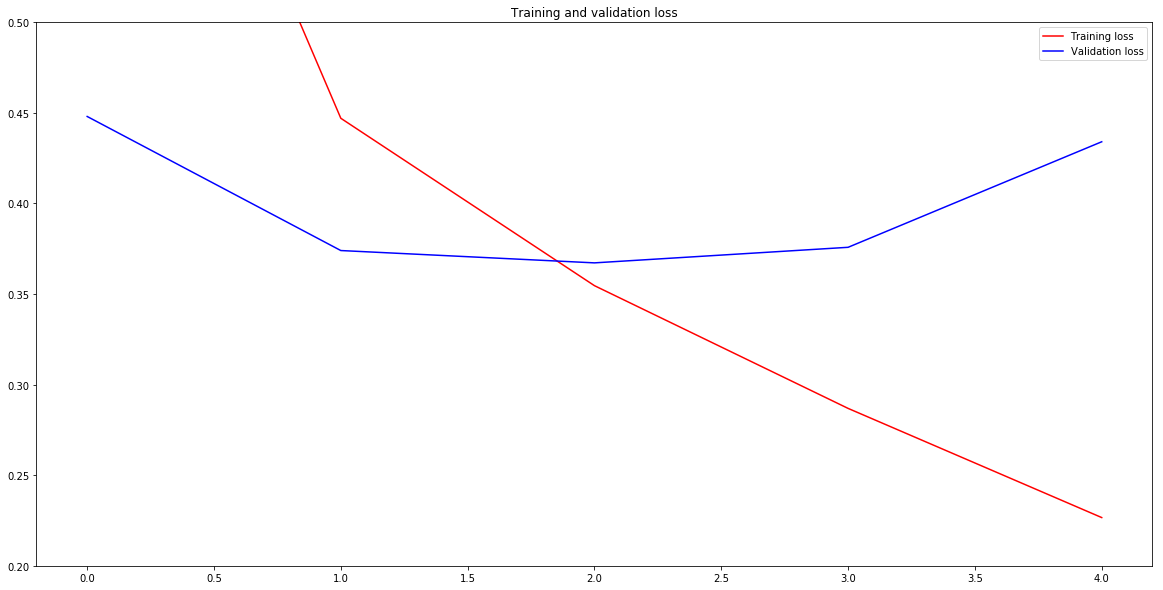

<Figure size 432x288 with 0 Axes>

In [85]:
plt.figure(figsize=(20,10))
val_loss = history.history['val_loss']
loss = history.history['loss']
epochs = range(len(val_loss))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.ylim(0.2,0.5)
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()


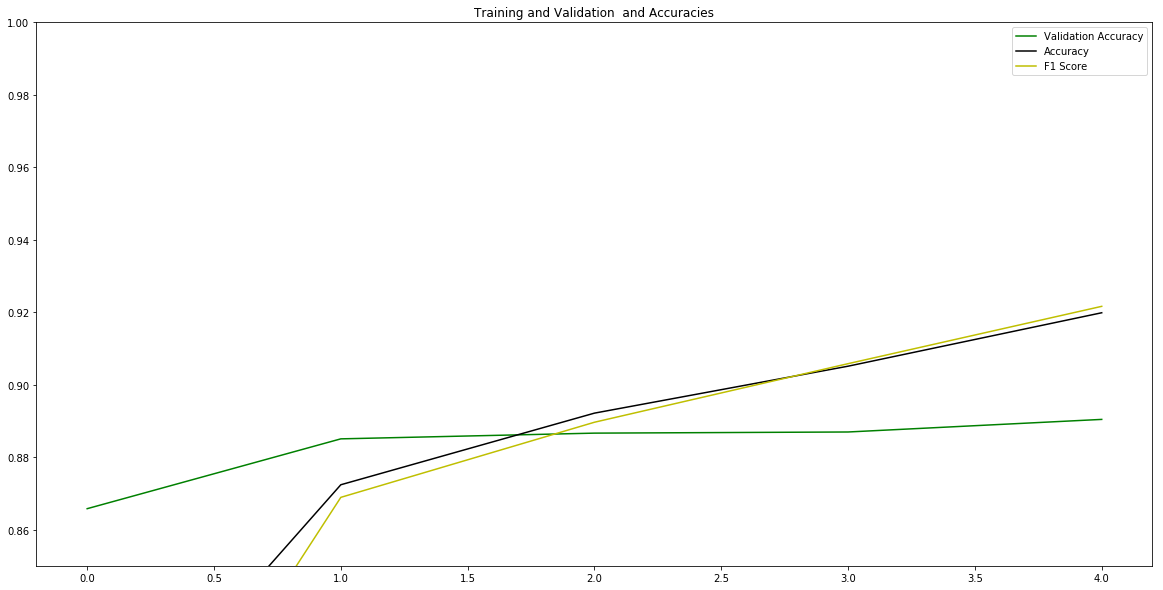

<Figure size 432x288 with 0 Axes>

In [86]:
plt.figure(figsize=(20,10))
val_acc = history.history['val_acc']
acc = history.history['acc']
f1 = history.history['f1']
plt.plot(epochs, val_acc,'g',label='Validation Accuracy')
plt.plot(epochs, acc,'k',label='Accuracy')
plt.plot(epochs, f1,'y',label='F1 Score')
plt.title('Training and Validation  and Accuracies')
plt.ylim(0.85,1.0,0.05)
plt.legend(loc='best')
plt.figure()
plt.show()

# Prediction and Submission
Prediction on the best model saved, around 89% of accuracy can be reached if we train on 10 epochs, in one of the model training I had achieved 89%, which I had saved for future use.

In [71]:
from keras.models import load_model
model=load_model('main_05-0.89.hdf5')

In [72]:
predicted_= model.predict(test_X,batch_size=32,verbose=1)

21102/21102 [==============================] - 45s 2ms/step


In [73]:
map_target_rev ={v: k for k, v in map_target.items()}

In [74]:
class_ = [np.argmax(predicted_[i]) for i in range(len(predicted_))]
test_data['MaterialType'] = [map_target_rev[class_[i]] for i in range(len(class_))]
test_data.head()

,ID,UsageClass,CheckoutType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear,all_text,MaterialType
0,31654,Physical,Horizon,2005,4,1,Footprints at the window,,"England Fiction, Space and time Fiction",,,footprints at the window england fiction space...,BOOK
1,31655,Physical,Horizon,2005,4,2,Seven brides for seven brothers,,"Video recordings for the hearing impaired, Mus...",,,seven brides for seven brothers video recordin...,VIDEOCASS
2,31656,Physical,Horizon,2005,4,2,History [sound recording] / Loudon Wainwright ...,"Wainwright, Loudon, III, 1946-",Popular music 1991 2000,"Charisma,",p1992.,history sound recording loudon wainwright iii ...,SOUNDDISC
3,31657,Physical,Horizon,2005,4,2,Doing big business on the internet,,"Internet, Internet advertising, Information ne...",,,doing big business on the internet internet in...,BOOK
4,31658,Physical,Horizon,2005,4,2,Lets learn how to dance shag,,"Shag Dance, Ballroom dancing",,,lets learn how to dance shag shag dance ballro...,VIDEOCASS


In [75]:
test_data[['ID','MaterialType']].to_csv('sub_mat.csv',index=False)

# Next Steps On Improvement

1. Add Fasttext, paragram embeddings and take their average for training. Adding Fasttext for feature building would make a lot more sense since Fasttext focusses more on building vector of ngrams of the word, so words like "fictiondial" will have a word vector in Fasttext. We have around 16k words for which we could'nt find the word vectors. For these words we can find corresponding word vector from Fasttext.
2. Improvement on the architecture by finding the appropriate hidden units and making it more deeper.

In [95]:
words_not_found[0:10]

['illm',
 'bildungsromans',
 'fictionharpercollins',
 'fictionharcourt',
 'fictionrandom',
 'fictionviking',
 'fictionhoughton',
 'fictionfarrar',
 'fictionsimon',
 'fictionthorndike']